In [1]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import whiten 
import matplotlib.pyplot as plt
%matplotlib inline

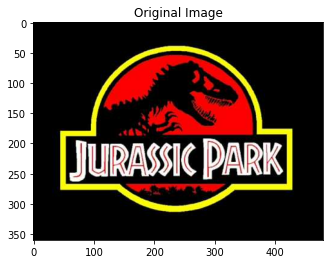

In [2]:
img_data = Image.open('jurassic_park.jpg' )
#converting image to numpy array
img_arr = np.array(img_data) 
plt.imshow(img_arr)
plt.title('Original Image')
plt.show()

In [3]:
img_arr.shape

(360, 480, 3)

In [4]:
img_arr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [5]:
# Scaling the image pixels values within 0-1
img = img_arr / 255
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [6]:
# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
image_2D = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
image_2D.shape

(172800, 3)

In [7]:
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
km = KMeans(n_clusters=4, random_state=1234).fit(image_2D)

In [8]:
# Clusters predicted
km.predict(image_2D)

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# Clusters predicted
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
km.labels_.shape

(172800,)

In [11]:
# Unique Clusters predicted
np.unique(km.labels_)

array([0, 1, 2, 3])

In [12]:
#cluster cetroids
km.cluster_centers_

array([[0.01419145, 0.00666507, 0.00567227],
       [0.94108808, 0.94731878, 0.13374468],
       [0.83189083, 0.08185241, 0.07246014],
       [0.93443192, 0.89090392, 0.88514311]])

In [13]:
km.cluster_centers_.shape

(4, 3)

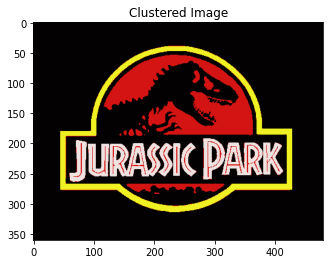

In [14]:
#Plotting the segmented image after clustering
clustered = km.cluster_centers_[km.labels_]
# Reshape back the image from 2D to 3D image
clustered_3D = clustered.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(clustered_3D)
plt.title('Clustered Image')
plt.show()

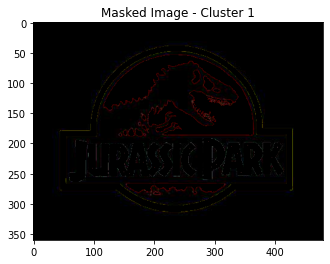

In [15]:
#Plotting only Cluster 1
masked = np.copy(image_2D)
masked[km.labels_!=0] = [0,0,0]
masked_3D = masked.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(masked_3D)
plt.title('Masked Image - Cluster 1')
plt.show()

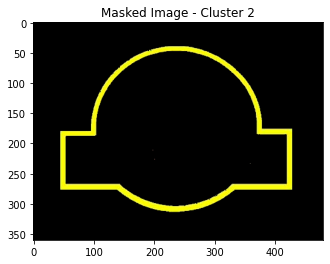

In [16]:
#Plotting only Cluster 2
masked = np.copy(image_2D)
masked[km.labels_!=1] = [0,0,0]
masked_3D = masked.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(masked_3D)
plt.title('Masked Image - Cluster 2')
plt.show()

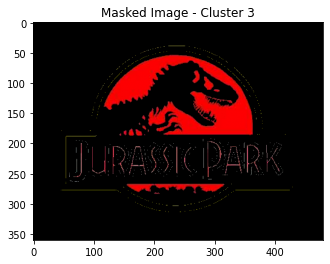

In [17]:
#Plotting only Cluster 3
masked = np.copy(image_2D)
masked[km.labels_!=2] = [0,0,0]
masked_3D = masked.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(masked_3D)
plt.title('Masked Image - Cluster 3')
plt.show()

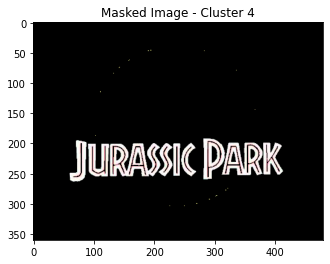

In [18]:
#Plotting only Cluster 4
masked = np.copy(image_2D)
masked[km.labels_!=3] = [0,0,0]
masked_3D = masked.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(masked_3D)
plt.title('Masked Image - Cluster 4')
plt.show()

In [19]:
# Dominent colors are the km.cluster_centers_
# But the cluster centers obtained are standardized RGB values
# Standardized value = Actual value / Standard Deviation

In [20]:
# Prepare RGB lists for the image 
r = []
g = []
b = []
for line in img_arr:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [21]:
# Prepare datafarme with the RGB list
df = pd.DataFrame({'red': r,'blue': b,'green': g})

In [22]:
# Get standard deviations of each color 
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

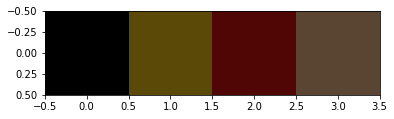

In [23]:
colors = []
for cluster_center in km.cluster_centers_:
    # Convert each standardized value to scaled value 
    # Actual value = Standardized value * Standard Deviation
    # Scaled value = Actual value / 255
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))
#Plotting the dominent colors
plt.imshow([colors])
plt.show()